<a href="https://colab.research.google.com/github/Walt9819/factores-impacto-desempleo-mexico/blob/main/AD_Python/restaurantes_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recuperación económica post-COVID: Localización óptima de restaurantes en México**

# **Módulo 4:  Análisis de datos con Python**

## **Conjuntos de datos**
La información explorada para este proyecto y módulo esta conformada por:
*   Encuesta intercensal 2015
*   Censos económicos 2019
*   ENOE
*   DENUE


## **Definición de módulos**

In [12]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.4MB/s 
     |████████████████████████████████| 15.3MB 243kB/s 
     |████████████████████████████████| 6.5MB 50.5MB/s 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import geopandas

In [ ]:
LABELS = [0,1,2,3,4,5,6]

## **Integración de los conjuntos de datos**

In [64]:
denue = pd.read_csv(r"https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/AD_Python/data/denue_final.csv", sep = ';')
denue

,Unnamed: 0,cve_ent_mun,Restaurantes con servicio de preparación de alimentos a la carta o de comida corrida,Restaurantes con servicio de preparación de antojitos,Restaurantes con servicio de preparación de pescados y mariscos,"Restaurantes con servicio de preparación de pizzas, hamburguesas, hot dogs y pollos rostizados para llevar",Restaurantes con servicio de preparación de tacos y tortas,Restaurantes de autoservicio,Restaurantes que preparan otro tipo de alimentos para llevar
0,0,10001,9.0,54.0,4.0,13.0,15.0,2.0,7.0
1,1,10002,4.0,2.0,0.0,2.0,1.0,0.0,0.0
2,2,10003,1.0,3.0,0.0,0.0,1.0,0.0,0.0
3,3,10004,14.0,61.0,5.0,20.0,18.0,2.0,8.0
4,4,10005,244.0,1500.0,141.0,394.0,480.0,67.0,197.0
...,...,...,...,...,...,...,...,...,...
2401,2401,9013,157.0,547.0,58.0,181.0,332.0,27.0,364.0
2402,2402,9014,1108.0,308.0,111.0,251.0,739.0,113.0,367.0
2403,2403,9015,2018.0,804.0,204.0,377.0,1448.0,209.0,945.0
2404,2404,9016,904.0,468.0,117.0,163.0,644.0,99.0,420.0


In [65]:
denue.columns = ['idx', 'imun',
       'comida_carta_corrida',
       'antojitos',
       'pescados_mariscos',
       'pizzas_hamburguesas_hotdogs_pollos_rostizados',
       'tacos_tortas',
       'autoservicio',
       'otro_tipo_alimentos']

In [21]:
indicadores_socioeconomicos = pd.read_csv(r"https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/AD_Python/data/indicadores_socioeconomicos.csv")
indicadores_socioeconomicos

,id_ent_mun,entidad,municipio,ing_lab,ocupados,desocupados,pob,pob_muj,pob_hom,pob_0_4,pob_5_9,pob_10_14,pob_15_19,pob_20_24,pob_25_29,pob_30_34,pob_35_39,pob_40_44,pob_45_49,pob_50_54,pob_55_59,pob_60_64,pob_65_more
0,1001,NaN,Aguascalientes,7676.46,300564,24836.0,974529.0,496496.0,478033.0,76830.0,81212.0,84814.0,87843.0,87717.0,85136.0,77028.0,68786.0,63800.0,61048.0,54146.0,45343.0,35638.0,65188.0
1,1002,NaN,Asientos,5863.52,8138,693.0,51383.0,25810.0,25573.0,4987.0,5181.0,5240.0,5115.0,4749.0,4380.0,3830.0,3223.0,2819.0,2591.0,2184.0,1783.0,1481.0,3820.0
2,1003,NaN,Calvillo,5784.97,14757,199.0,61389.0,31334.0,30055.0,5465.0,5612.0,5795.0,5733.0,5207.0,4738.0,4288.0,3737.0,3321.0,3223.0,3052.0,2765.0,2455.0,5998.0
3,1004,NaN,Cosío,6096.05,3801,87.0,17076.0,8690.0,8386.0,1588.0,1718.0,1755.0,1698.0,1526.0,1371.0,1237.0,1096.0,977.0,898.0,768.0,642.0,531.0,1271.0
4,1005,NaN,Jesús María,6262.18,37341,3187.0,132340.0,65849.0,66491.0,13140.0,13685.0,13427.0,12657.0,11812.0,11645.0,11355.0,10216.0,8478.0,6853.0,5299.0,4198.0,3361.0,6214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,32052,NaN,Villa García,6558.72,8178,846.0,20306.0,10237.0,10069.0,2098.0,2206.0,2111.0,1803.0,1558.0,1609.0,1612.0,1398.0,1180.0,1041.0,869.0,728.0,616.0,1477.0
925,32053,NaN,Villa González Ortega,3762.57,5925,470.0,14035.0,7220.0,6815.0,1467.0,1437.0,1429.0,1336.0,1150.0,1038.0,951.0,832.0,761.0,755.0,675.0,559.0,471.0,1174.0
926,32054,NaN,Villa Hidalgo,1877.31,7685,NaN,20278.0,10200.0,10078.0,2051.0,2097.0,2102.0,1977.0,1704.0,1536.0,1463.0,1356.0,1178.0,1032.0,905.0,782.0,635.0,1460.0
927,32056,NaN,Zacatecas,7421.03,48024,3552.0,156434.0,80352.0,76082.0,12439.0,12814.0,12587.0,13280.0,14030.0,13834.0,12467.0,11058.0,10165.0,10017.0,9459.0,8241.0,6230.0,9813.0


In [22]:
indicadores_socioeconomicos.columns = ['imun', 'entidad', 'municipio', 'ing_lab', 'ocupados',
       'desocupados', 'pob', 'pob_muj', 'pob_hom', 'pob_0_4', 'pob_5_9',
       'pob_10_14', 'pob_15_19', 'pob_20_24', 'pob_25_29', 'pob_30_34',
       'pob_35_39', 'pob_40_44', 'pob_45_49', 'pob_50_54', 'pob_55_59',
       'pob_60_64', 'pob_65_more']

In [130]:
dataframe = pd.read_csv(r"https://raw.githubusercontent.com/Walt9819/factores-impacto-desempleo-mexico/main/AD_Python/data/Indicadores_INEGI_covid19.csv", encoding = 'ISO-8859-1')
dataframe

,imun,ent,nom_ent,mun,nom_mun,pobtot,pob_m,pob_f,pob60,pob60_m,pob60_f,pob00_24,pob25_59,i_envejeci,p_pob_m,p_pob_f,p_pob60,p_pob60_m,p_pob60_f,p_pob00_24,p_pob25_59,afrodesc,hlengua,p_afrodesc,p_hlengua,asis3_5,asis3_5m,asis3_5f,asis6_11,asis6_11m,asis6_11f,asis12_14,asis12_14m,asis12_14f,asis15_17,asis18_24,prom_esc,p_asis3_5,p_asis3_5m,p_asis3_5f,...,p_tv,p_celular,p_internet,dens_consh,dens_camah,td_neumoni,td_influen,td_corazon,td_diabete,td_hiperte,td_respcro,p_obes20,p_obes60,p_hipert20,p_hipert60,p_diabet20,p_diabet60,p_obht20,p_obht60,p_sobhtd20,tot_est,est_e_a,est_e_p,est_n_e_a,est_n_e_p,tot_p_o,po_e_a,po_e_p,po_n_e_a,po_n_e_p,tot_po_h,tot_p_h_e_a,tot_p_h_e_p,tot_p_h_n_e_a,tot_p_h_n_e_p,tot_po_m,tot_p_m_e_a,tot_p_m_e_p,tot_p_m_n_e_a,tot_p_m_n_e_p
0,0,0,Estados Unidos Mexicanos,NaN,Total,119530753.0,58056133.0,61474620.0,12436321.0,5750299.0,6686022.0,54189673.0,52817990.0,26.10,48.57,51.43,10.40,46.24,53.76,45.34,44.19,1381853.0,7382785.0,1.16,6.52,4134339.0,2085665.0,2048674.0,12921177.0,6547702.0,6373475.0,6358021.0,3198257.0,3159764.0,4730969.0,4711637.0,9.16,62.99,31.78,31.21,...,92.90,78.53,32.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.07,33.75,18.38,42.37,10.32,25.09,10.52,19.25,5.15,6269309,3381133,53.93,2888175,46.07,35463625,17199988,48.50,18263637,51.50,19917578,9685238,48.63,1.023234e+07,51.37,15546046,7514751,48.34,8031296,51.66
1,1000,1,Aguascalientes,0.0,Total,1312544.0,640091.0,672453.0,113009.0,52224.0,60785.0,639265.0,559561.0,19.36,48.77,51.23,8.61,46.21,53.79,48.70,42.63,653.0,3105.0,0.05,0.25,45918.0,24032.0,21886.0,150443.0,74942.0,75501.0,78647.0,39325.0,39322.0,53176.0,53299.0,9.73,59.27,31.02,28.25,...,97.60,86.18,35.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.59,27.79,14.70,32.08,7.56,21.43,7.88,15.10,2.28,68227,35142,51.51,33085,48.49,487392,213036,43.71,274357,56.29,280145,119446,42.64,1.606995e+05,57.36,207247,93590,45.16,113657,54.84
2,1001,1,Aguascalientes,1.0,Aguascalientes,877190.0,425731.0,451459.0,78958.0,35859.0,43099.0,410806.0,386950.0,21.04,48.53,51.47,9.00,45.42,54.58,46.83,44.11,532.0,2395.0,0.06,0.29,29014.0,15593.0,13421.0,94917.0,46517.0,48400.0,50642.0,25381.0,25261.0,35220.0,41015.0,10.21,60.18,32.34,27.84,...,98.05,88.84,42.03,3.43,14.20,2.08,0.04,5.85,5.37,1.83,2.99,31.49,NaN,14.94,NaN,7.50,NaN,NaN,NaN,NaN,46426,23283,50.15,23142,49.85,334896,153478,45.83,181418,54.17,193110,87514,45.32,1.055962e+05,54.68,141786,65964,46.52,75821,53.48
3,1002,1,Aguascalientes,2.0,Asientos,46464.0,22745.0,23719.0,3918.0,1881.0,2037.0,24487.0,18023.0,18.96,48.95,51.05,8.43,48.01,51.99,52.70,38.79,-8.0,-8.0,-8.00,-8.00,1857.0,893.0,964.0,5932.0,2975.0,2957.0,3094.0,1567.0,1527.0,1851.0,1130.0,7.85,56.70,27.27,29.44,...,95.55,71.47,9.83,0.00,0.00,0.40,0.00,3.21,4.61,0.80,3.41,32.28,NaN,15.32,NaN,7.95,NaN,NaN,NaN,NaN,989,549,55.51,440,44.49,5165,2023,39.17,3142,60.83,3350,996,29.73,2.354000e+03,70.27,1815,1027,56.58,788,43.42
4,1003,1,Aguascalientes,3.0,Calvillo,56048.0,27298.0,28750.0,6447.0,3148.0,3299.0,27790.0,21773.0,27.03,48.70,51.30,11.50,48.83,51.17,49.58,38.85,10.0,-8.0,0.02,-8.00,2151.0,1087.0,1064.0,6585.0,3364.0,3221.0,3232.0,1538.0,1694.0,1924.0,1052.0,7.47,60.22,30.43,29.79,...,97.37,71.72,17.52,2.51,6.70,1.51,0.00,5.03,6.70,1.68,3.18,40.00,NaN,13.75,NaN,9.17,NaN,NaN,NaN,NaN,3280,1750,53.37,1529,46.63,14944,7370,49.32,7573,50.68,7356,3560,48.40,3.796000e+03,51.60,7587,3810,50.22,3777,49.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,32054,32,Zacatecas,54.0,Villa Hidalgo,19155.0,9433.0,9722.0,1903.0,945.0,958.0,9744.0,7508.0,22.72,49.20,50.80,9.90,49.70,50.30,50.90,39.20,-8.0,-8.0,-8.00,-8.00,916.0,462.0,454.0,2386.0,1220.0,1166.0,1088.0,557.0,531.0,758.0,451.0,7.55,72.00,36.30,35.70,...,94.70,64.90,7.60,0.

In [131]:
dataframe = dataframe.merge(denue, on='imun', how='left')

In [83]:
mun_geo = geopandas.read_file("mun2019gw.shp")
#mun_geo = requests.get(url).json()

In [84]:
mun_geo

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.68569 22.09963, -102.69087 22.0..."
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.33568 22.05067, -102.33348 22.0..."
...,...,...,...,...,...,...,...,...,...,...
2460,32054,32,054,Zacatecas,37142.598661,119.022381,2460,2461,Villa Hidalgo,"POLYGON ((-101.69490 22.51777, -101.69472 22.5..."
2461,32055,32,055,Zacatecas,215650.560215,351.736263,2461,2462,Villanueva,"POLYGON ((-102.78252 22.67373, -102.78221 22.6..."
2462,32056,32,056,Zacatecas,43682.101046,139.065402,2462,2463,Zacatecas,"POLYGON ((-102.76690 22.84147, -102.76619 22.8..."
2463,32057,32,057,Zacatecas,21844.700671,66.167468,2463,2464,Trancoso,"POLYGON ((-102.22547 22.80920, -102.22946 22.7..."


In [132]:
dataframe.shape

(2496, 156)

In [133]:
mask = (dataframe.mun != 0)
dataframe = dataframe.loc[mask]
dataframe.shape

(2464, 156)

In [134]:
dataframe = dataframe[dataframe['mun'].notna()]
dataframe.shape

(2463, 156)

In [135]:
dataframe = dataframe[['imun','ent','nom_ent','mun','nom_mun','pobtot','pea','ocupada',
                       'tra_omun','tot_est','est_e_a','est_n_e_a',
                       'tot_p_o','po_e_a','po_n_e_a','comida_carta_corrida',
                       'antojitos','pescados_mariscos','pizzas_hamburguesas_hotdogs_pollos_rostizados',
                       'tacos_tortas','autoservicio','otro_tipo_alimentos']]

In [136]:
dataframe = dataframe.fillna(0)

In [137]:
dataframe['CVEGEO'] = dataframe['imun'].apply(lambda x: str(x).zfill(5))
dataframe

,imun,ent,nom_ent,mun,nom_mun,pobtot,pea,ocupada,tra_omun,tot_est,est_e_a,est_n_e_a,tot_p_o,po_e_a,po_n_e_a,comida_carta_corrida,antojitos,pescados_mariscos,pizzas_hamburguesas_hotdogs_pollos_rostizados,tacos_tortas,autoservicio,otro_tipo_alimentos,CVEGEO
2,1001,1,Aguascalientes,1.0,Aguascalientes,877190.0,382550.0,367528.0,9344.0,46426,23283,23142,334896,153478,181418,402.0,2092.0,192.0,506.0,1046.0,96.0,338.0,01001
3,1002,1,Aguascalientes,2.0,Asientos,46464.0,13914.0,13108.0,3585.0,989,549,440,5165,2023,3142,6.0,44.0,3.0,11.0,37.0,0.0,5.0,01002
4,1003,1,Aguascalientes,3.0,Calvillo,56048.0,20099.0,19352.0,298.0,3280,1750,1529,14944,7370,7573,14.0,122.0,4.0,26.0,58.0,2.0,4.0,01003
5,1004,1,Aguascalientes,4.0,Cosío,15577.0,4869.0,4627.0,1579.0,1000,591,408,4538,3172,1366,0.0,27.0,3.0,2.0,10.0,0.0,2.0,01004
6,1005,1,Aguascalientes,5.0,Jesús María,120405.0,51020.0,49795.0,19699.0,6377,3402,2975,63320,22688,40631,28.0,207.0,24.0,57.0,154.0,3.0,28.0,01005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,32054,32,Zacatecas,54.0,Villa Hidalgo,19155.0,4538.0,4324.0,387.0,423,235,188,1176,690,486,0.0,17.0,2.0,9.0,10.0,0.0,0.0,32054
2492,32055,32,Zacatecas,55.0,Villanueva,30240.0,9018.0,8176.0,933.0,3532,2063,1468,8319,4943,3376,10.0,69.0,9.0,22.0,48.0,2.0,3.0,32055
2493,32056,32,Zacatecas,56.0,Zacatecas,146147.0,60889.0,58330.0,4770.0,9716,5047,4669,82912,41650,41262,134.0,305.0,41.0,101.0,222.0,32.0,44.0,32056
2494,32057,32,Zacatecas,57.0,Trancoso,19413.0,6039.0,5703.0,2474.0,665,408,257,1928,1011,917,3.0,30.0,1.0,11.0,10.0,0.0,0.0,32057


In [138]:
dataframe.columns

Index(['imun', 'ent', 'nom_ent', 'mun', 'nom_mun', 'pobtot', 'pea', 'ocupada',
       'tra_omun', 'tot_est', 'est_e_a', 'est_n_e_a', 'tot_p_o', 'po_e_a',
       'po_n_e_a', 'comida_carta_corrida', 'antojitos', 'pescados_mariscos',
       'pizzas_hamburguesas_hotdogs_pollos_rostizados', 'tacos_tortas',
       'autoservicio', 'otro_tipo_alimentos', 'CVEGEO'],
      dtype='object')

In [76]:
mun_geo.columns

Index(['﻿CVEGEO', '﻿CVE_ENT', '﻿CVE_MUN', '﻿NOM_ENT', '﻿AREA', '﻿PERIMETER',
       '﻿COV_', '﻿COV_ID', '﻿NOM_MUN', 'geometry'],
      dtype='object')

In [139]:
municipios_merge = pd.merge(mun_geo, dataframe, left_on = ['CVEGEO'], right_on = ['CVEGEO'], how = 'left')
municipios_merge

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry,imun,ent,nom_ent,mun,nom_mun,pobtot,pea,ocupada,tra_omun,tot_est,est_e_a,est_n_e_a,tot_p_o,po_e_a,po_n_e_a,comida_carta_corrida,antojitos,pescados_mariscos,pizzas_hamburguesas_hotdogs_pollos_rostizados,tacos_tortas,autoservicio,otro_tipo_alimentos
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",1001.0,1.0,Aguascalientes,1.0,Aguascalientes,877190.0,382550.0,367528.0,9344.0,46426.0,23283.0,23142.0,334896.0,153478.0,181418.0,402.0,2092.0,192.0,506.0,1046.0,96.0,338.0
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.05189 22.29144, -102.05121 22.2...",1002.0,1.0,Aguascalientes,2.0,Asientos,46464.0,13914.0,13108.0,3585.0,989.0,549.0,440.0,5165.0,2023.0,3142.0,6.0,44.0,3.0,11.0,37.0,0.0,5.0
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.68569 22.09963, -102.69087 22.0...",1003.0,1.0,Aguascalientes,3.0,Calvillo,56048.0,20099.0,19352.0,298.0,3280.0,1750.0,1529.0,14944.0,7370.0,7573.0,14.0,122.0,4.0,26.0,58.0,2.0,4.0
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.28787 22.41649, -102.28753 22.4...",1004.0,1.0,Aguascalientes,4.0,Cosío,15577.0,4869.0,4627.0,1579.0,1000.0,591.0,408.0,4538.0,3172.0,1366.0,0.0,27.0,3.0,2.0,10.0,0.0,2.0
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",1005.0,1.0,Aguascalientes,5.0,Jesús María,120405.0,51020.0,49795.0,19699.0,6377.0,3402.0,2975.0,63320.0,22688.0,40631.0,28.0,207.0,24.0,57.0,154.0,3.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,32054,32,054,Zacatecas,37142.598661,119.022381,2460,2461,Villa Hidalgo,"POLYGON ((-101.69490 22.51777, -101.69472 22.5...",32054.0,32.0,Zacatecas,54.0,Villa Hidalgo,19155.0,4538.0,4324.0,387.0,423.0,235.0,188.0,1176.0,690.0,486.0,0.0,17.0,2.0,9.0,10.0,0.0,0.0
2461,32055,32,055,Zacatecas,215650.560215,351.736263,2461,2462,Villanueva,"POLYGON ((-102.78252 22.67373, -102.78221 22.6...",32055.0,32.0,Zacatecas,55.0,Villanueva,30240.0,9018.0,8176.0,933.0,3532.0,2063.0,1468.0,8319.0,4943.0,3376.0,10.0,69.0,9.0,22.0,48.0,2.0,3.0
2462,32056,32,056,Zacatecas,43682.101046,139.065402,2462,2463,Zacatecas,"POLYGON ((-102.76690 22.84147, -102.76619 22.8...",32056.0,32.0,Zacatecas,56.0,Zacatecas,146147.0,60889.0,58330.0,4770.0,9716.0,5047.0,4669.0,82912.0,41650.0,41262.0,134.0,305.0,41.0,101.0,222.0,32.0,44.0
2463,32057,32,057,Zacatecas,21844.700671,66.167468,2463,2464,Trancoso,"POLYGON ((-102.22547 22.80920, -102.22946 22.7...",32057.0,32.0,Zacatecas,57.0,Trancoso,19413.0,6039.0,5703.0,2474.0,665.0,408.0,257.0,1928.0,1011.0,917.0,3.0,30.0,1.0,11.0,10.0,0.0,0.0


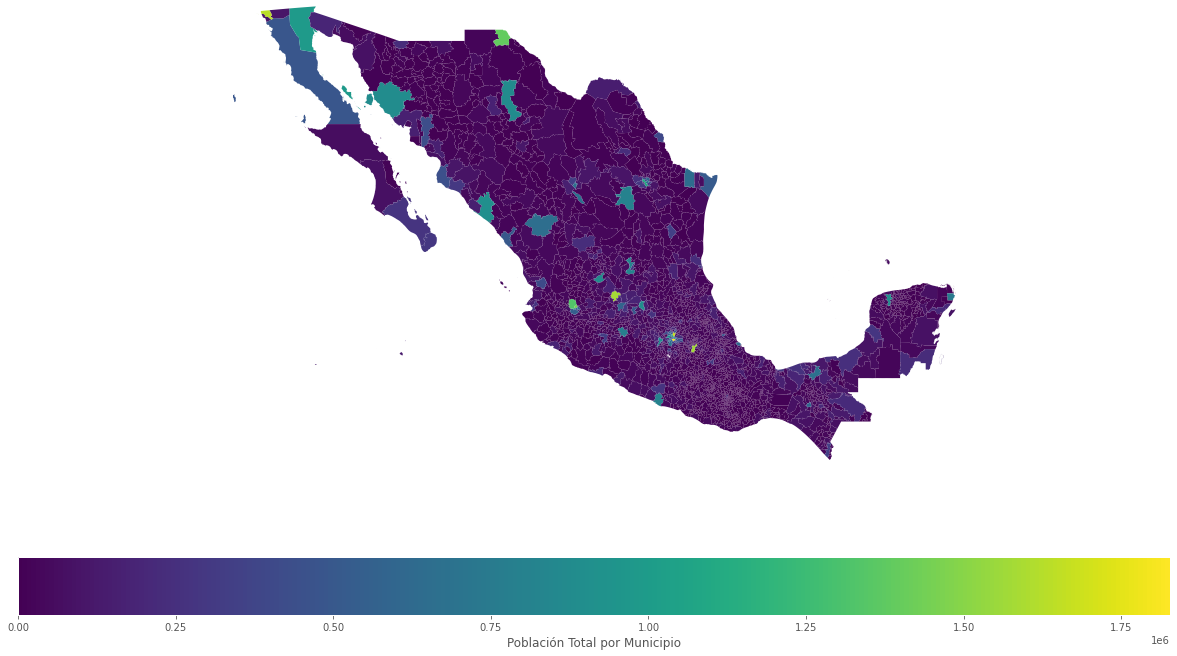

In [140]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

municipios_merge.plot(ax=ax, column='pobtot', legend=True, legend_kwds={'label': "Población Total por Municipio", 
                                                                        'orientation': "horizontal"})
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

Visualizar las dimensiones

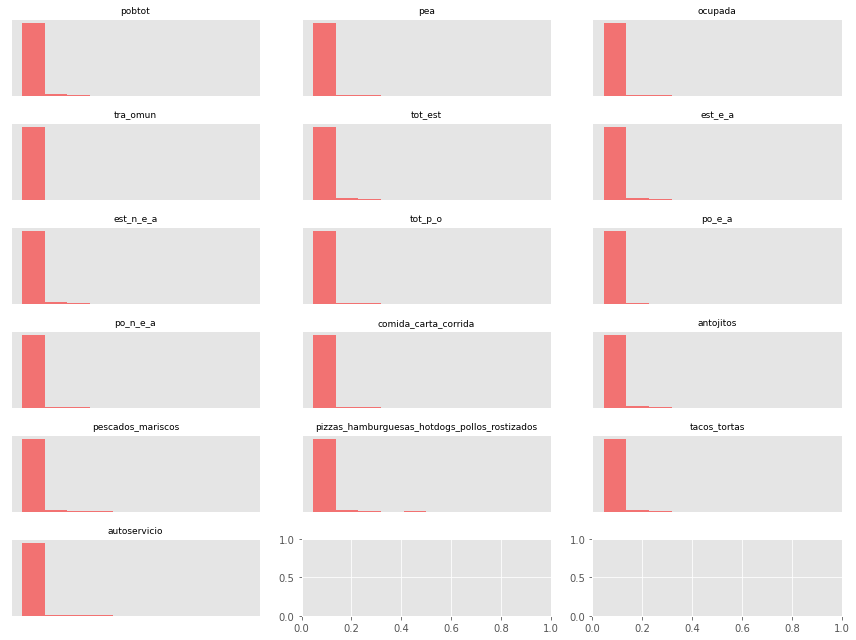

In [141]:
fig,axes =plt.subplots(6,3, figsize=(12, 9)) # 6 columnas cada una con 3 figuras, total 17 features

df = dataframe.drop(['imun', 'ent', 'nom_ent','mun','nom_mun','CVEGEO'], axis=1)
ax=axes.ravel()
for i in range(len(df.columns)-1):
  _,bins=np.histogram(df[df.columns[i]],bins=10)
  ax[i].hist(df.values[:,i],color='r',alpha=.5)
  ax[i].set_title(df.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
plt.tight_layout()
plt.show()

Normalización de los datos

In [142]:
scaler=StandardScaler()#instantiate
df = dataframe.drop(['imun', 'ent', 'nom_ent','mun','nom_mun','CVEGEO'], axis=1)
scaler.fit(df) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(df)# transforma los datos a su nueva escala

In [143]:
X_scaled

array([[ 5.96660941,  5.96033788,  5.96303485, ...,  5.56910192,
         4.80058667,  3.2452995 ],
       [-0.01487984, -0.08470317, -0.0887403 , ..., -0.10100787,
        -0.21091069, -0.21207187],
       [ 0.05412799,  0.01672094,  0.01787694, ...,  0.01700234,
        -0.10650449, -0.22245437],
       ...,
       [ 0.70286921,  0.68561173,  0.68343219, ...,  0.93860592,
         1.45958843,  0.1928455 ],
       [-0.20965557, -0.21384058, -0.2151818 , ..., -0.25273529,
        -0.21091069, -0.26398436],
       [-0.33031126, -0.30122766, -0.30158207, ..., -0.28645249,
        -0.15870759, -0.26398436]])

In [144]:
pca=PCA(n_components=5)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (2463, 5)


In [145]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 99% de varianza explicada

[0.86003996 0.04322462 0.03703831 0.0198269  0.01260885]
suma: 0.9727386262841514


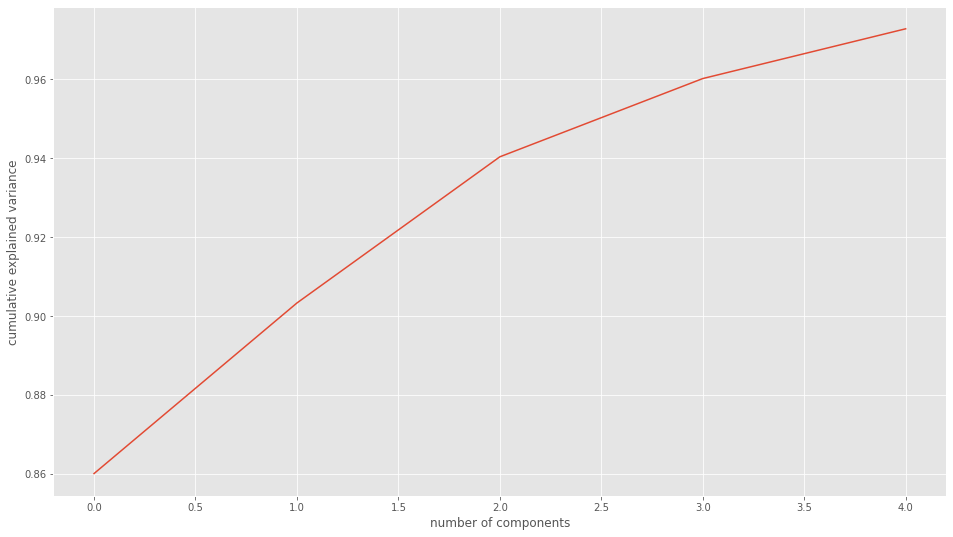

In [146]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

No handles with labels found to put in legend.


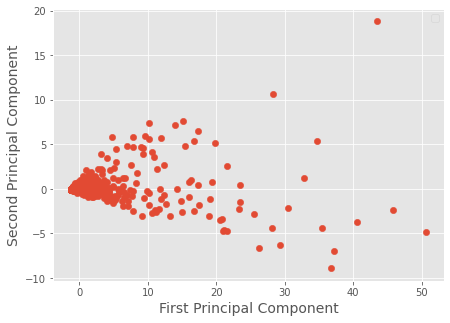

In [147]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

ax.scatter(Xax,Yax,s=40)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


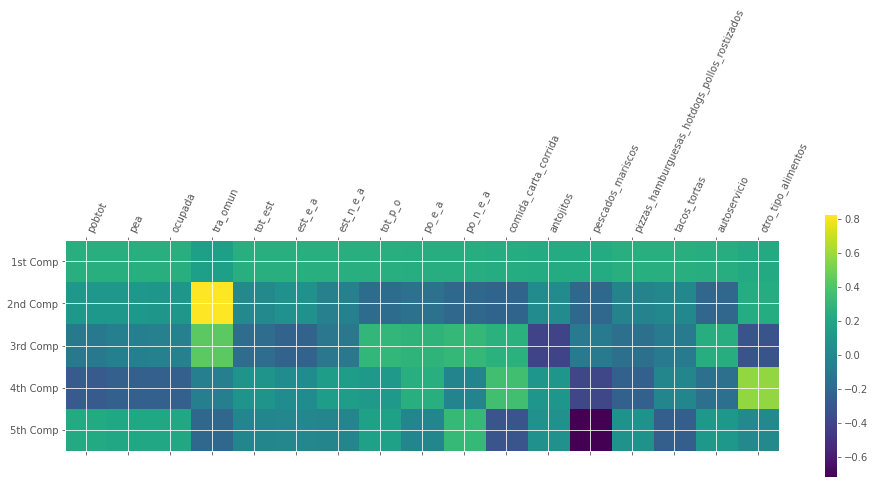

In [148]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [149]:
components = pd.DataFrame(pca.components_, columns = df.columns)
components.shape

(5, 17)

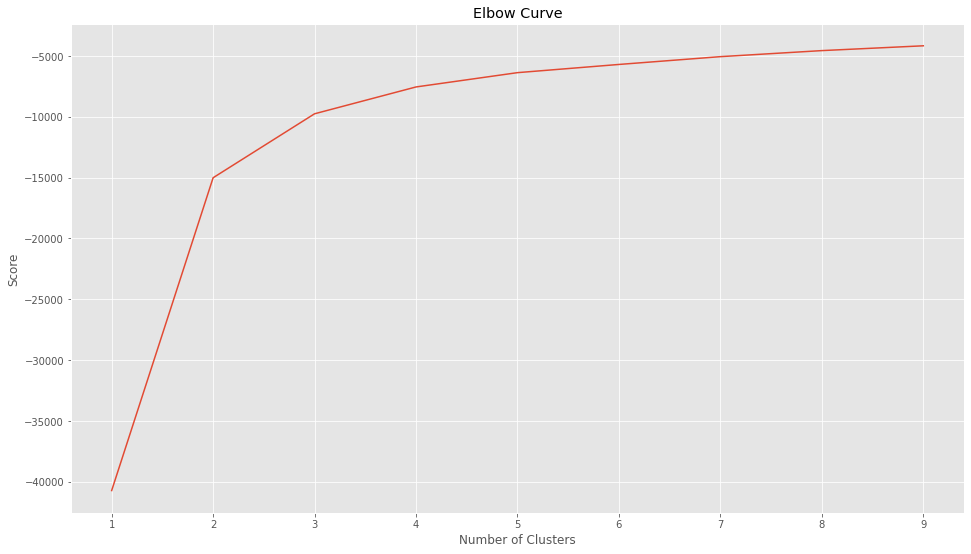

In [150]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [151]:
# Para el ejercicio, elijo 3 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=3).fit(X_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[-6.47023949e-01 -1.60886369e-02  1.01551927e-03  8.98266726e-03
   6.70506725e-04]
 [ 1.00461632e+01  9.65338831e-01 -4.92982763e-02 -3.13177617e-01
  -1.32463203e-01]
 [ 3.01098515e+01 -1.63641716e+00  6.45105061e-02  1.61004054e-01
   3.75638787e-01]]


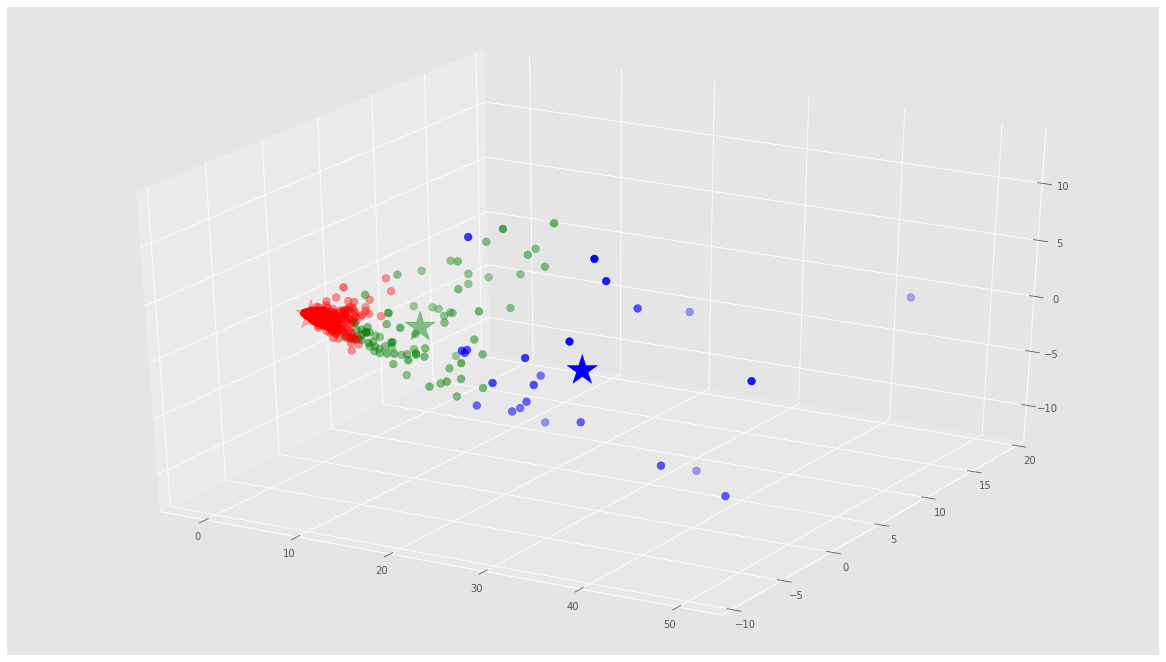

In [152]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X_pca)
# Obtenemos los centroids
C = kmeans.cluster_centers_
#colores=['red','green','blue','cyan','yellow','black','white']
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [154]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['imun']=dataframe['imun'].values
copy['ent']=dataframe['ent'].values
copy['nom_ent']=dataframe['nom_ent'].values
copy['mun']=dataframe['mun'].values
copy['nom_mun']=dataframe['nom_mun'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,2359
1,green,80
2,blue,24


In [155]:
copy.head()

,imun,ent,nom_ent,mun,nom_mun,label
0,1001,1,Aguascalientes,1.0,Aguascalientes,2
1,1002,1,Aguascalientes,2.0,Asientos,0
2,1003,1,Aguascalientes,3.0,Calvillo,0
3,1004,1,Aguascalientes,4.0,Cosío,0
4,1005,1,Aguascalientes,5.0,Jesús María,0


In [159]:
# creating a list of column names 
#column_values = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'] 
column_values = ['C1','C2','C3','C4','C5']  
# creating the dataframe 
df_pca = pd.DataFrame(data = X_pca,    
                  columns = column_values) 

In [160]:
df_pca['CVEGEO']=dataframe['CVEGEO'].values
df_pca['imun']=dataframe['imun'].values
df_pca['ent']=dataframe['ent'].values
df_pca['nom_ent']=dataframe['nom_ent'].values
df_pca['mun']=dataframe['mun'].values
df_pca['nom_mun']=dataframe['nom_mun'].values
df_pca['label'] = labels;
df_pca

,C1,C2,C3,C4,C5,CVEGEO,imun,ent,nom_ent,mun,nom_mun,label
0,23.350913,-2.218008,-4.278892,-0.733220,1.839982,01001,1001,1,Aguascalientes,1.0,Aguascalientes,2
1,-0.617292,0.192372,0.047680,-0.124721,0.062064,01002,1002,1,Aguascalientes,2.0,Asientos,0
2,0.025511,-0.116512,-0.269465,-0.031546,0.220913,01003,1003,1,Aguascalientes,3.0,Calvillo,0
3,-0.889819,0.015844,0.062073,0.004488,0.004438,01004,1004,1,Aguascalientes,4.0,Cosío,0
4,2.209113,0.842465,0.514012,-0.228534,0.185409,01005,1005,1,Aguascalientes,5.0,Jesús María,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2458,-1.014221,-0.042524,0.026194,-0.071348,0.033983,32054,32054,32,Zacatecas,54.0,Villa Hidalgo,0
2459,-0.245244,-0.093811,-0.221024,-0.014705,-0.070752,32055,32055,32,Zacatecas,55.0,Villanueva,0
2460,3.909044,-0.862915,0.243587,0.041703,0.068866,32056,32056,32,Zacatecas,56.0,Zacatecas,0
2461,-0.913845,0.100896,0.067747,-0.057236,0.033637,32057,32057,32,Zacatecas,57.0,Trancoso,0


In [168]:
mask = (df_pca.label == 2)
df_pca.loc[mask]

,C1,C2,C3,C4,C5,CVEGEO,imun,ent,nom_ent,mun,nom_mun,label
0,23.350913,-2.218008,-4.278892,-0.733220,1.839982,01001,1001,1,Aguascalientes,1.0,Aguascalientes,2
12,21.055598,-4.766493,1.943765,-4.015073,0.664984,02002,2002,2,Baja California,2.0,Mexicali,2
14,36.773918,-8.918326,6.776776,-5.416932,4.081752,02004,2004,2,Baja California,4.0,Tijuana,2
221,21.585531,-4.748483,2.080085,-3.025690,2.073902,08019,8019,8,Chihuahua,19.0,Chihuahua,2
239,29.372338,-6.319355,3.172505,-6.473810,7.369939,08037,8037,8,Chihuahua,37.0,Juárez,2
273,28.317874,10.618202,-0.478455,1.508515,-1.118597,09005,9005,9,Ciudad de México,5.0,Gustavo A. Madero,2
275,43.505394,18.783917,-0.685599,-0.755793,-2.117951,09007,9007,9,Ciudad de México,7.0,Iztapalapa,2
283,37.206157,-7.014559,12.904261,13.814677,-2.488085,09015,9015,9,Ciudad de México,15.0,Cuauhtémoc,2
284,20.524634,-3.501406,11.082183,6.178086,1.250886,09016,9016,9,Ciudad de México,16.0,Miguel Hidalgo,2
344,40.546152,-3.748926,-5.857888,-3.985682,1.519391,11020,11020,11,Guanajuato,20.0,León,2


In [162]:
y = df_pca['label']
X = df_pca.drop(['label','imun','ent','mun'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [163]:
mun_pca_merge = pd.merge(mun_geo, df_pca, left_on = ['CVEGEO'], right_on = ['CVEGEO'], how = 'left')

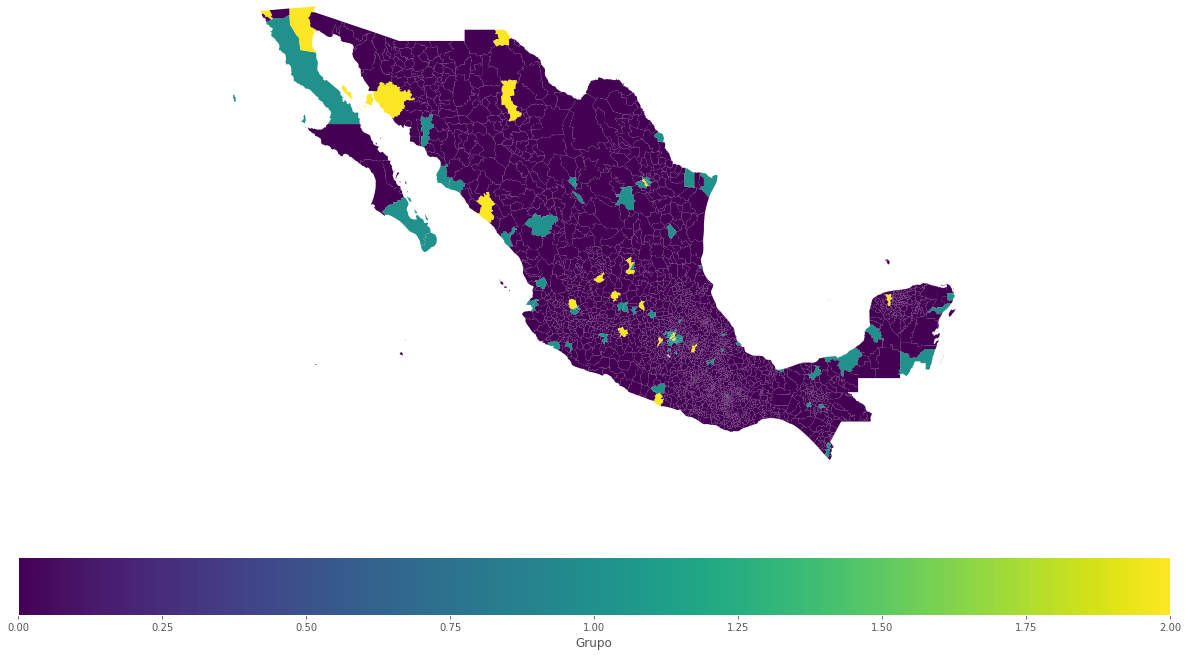

In [164]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

mun_pca_merge.plot(ax=ax, column='label', legend=True, legend_kwds={'label': "Grupo", 
                                                                        'orientation': "horizontal"})
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [165]:
import folium
m = folium.Map(location=[48, -102], zoom_start=3, width='60%', height='60%')

folium.Choropleth(
    geo_data=mun_geo,
    name='choropleth',
    data=df_pca,
    columns=['nom_mun', 'label'],
    key_on='CVEGEO',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Label'
).add_to(m)

folium.LayerControl().add_to(m)

m

## **1. Estimados de localización y variabilidad**

Vamos a usar estimados de locación y variabilidad para describir nuestro dataset. Ya tenemos un dataset limpio, así que ahora toca extraer información útil de él.

Recuerda que sólo es posible obtener estimados de locación y variabilidad cuando tenemos datos numéricos (tanto discretos como continuos).

La actividad consiste en lo siguiente:

1. Identifica las columnas de tu dataset que tengan datos numéricos.
2. Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
3. Obtén los siguientes estimados de tus columnas numéricas:
    
    a. Promedio 

    b. Mediana 

    c. Media Truncada 

    d. Desviación estándar 

    e. Rango 

    f. Percentiles 25 y 75 (por lo menos) 

    g. Rango intercuartil

## **2. Introducción a la visualización de datos: Distribuciones**

En este Postwork vamos a explorar las distribuciones de las variables numéricas que tengamos en nuestro dataset.

Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

1. Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
2. Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
3. Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
4. Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

## **3. Exploración de Variables Categóricas y Análisis Multivariable**

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. 

Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

1. Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
2. Identifica todas las variables categóricas en tu dataset.
3. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
5. Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
6. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
7. De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

## **4. Correlaciones y Regresión Linear Simple**

En este Postwork vamos a hacer análisis bivariado de nuestras variables numéricas. Si tu dataset sólo tiene variables categóricas o datos no estructurados (texto libre), entonces puedes pedirle a tu experta que te comparta algún dataset con el que puedas realizar estos ejercicios.

Utilizando tu dataset, realiza las siguientes actividades:

1. Identifica cuáles son las variables numéricas en tu dataset.
2. Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
3. Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
4. Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
5. Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
6. Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

## **5. Distribuciones muestrales y técnicas de evaluación de modelos**

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
    
    a. La distribución, su asimetría y curtosis
    
    b. El error estándar

    c. El intervalo de confianza que te parezca más apropiado

3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.
4. Comparte con tus compañeros y la experta tus hallazgos.

## **6. Visualización de Datos Avanzada**

En esta sesión conocimos muchos nuevos tipos de gráficas que nos ayudan a explorar y entender con más detalle nuestros datos. Ojalá y hayas percibido el poder tan grande que tienen las visualizaciones y la variedad tan enorme que existe. Cada visualización tiene sus ventajas y desventajas, sus características específicas, y es importante conocerlas bien para poder elegir la gráfica adecuada para cada momento. Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy. 

Aquí hay un pequeño 'cheat sheet' para tomar estas decisiones:

1. Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
2. Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
3. Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
4. Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
5. Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.

## **7. Procesamiento de Lenguaje Natural**
En esta sesión aprendimos dos cosas: Pruebas A/B y Procesamiento de Lenguaje Natural. No podemos practicar Pruebas A/B en nuestro proyecto, porque en realidad los proyectos que estamos realizando no se prestan a esto. No pasa nada, ¡ya tendrás oportunidad de practicar eso en tu primer trabajo como científico de datos!

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido. Si tu dataset no contiene datos no estructurados, busca un dataset apropiado y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

## **8. Clasificación No Supervisada y Supervisada**

En este Postwork haremos dos cosas: practicar la aplicación del algoritmo de Regresión Logística y resolver dudas generales sobre tu proyecto. Realiza los siguientes pasos:

1. Si hay un problema de clasificación binaria en tu proyecto, ¡genial! Aplica lo aprendido en esta sesión y entrena un modelo de Regresión Logística con tu dataset.
2. Si no hay un problema de clasificación binaria en tu proyecto, pídele ayuda a la experta para conseguir un dataset con el que puedas practicar.
3. Evalúa tu modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.
> Ojo: si tu proyecto tiene un problema de clasificación multiclase (es decir, la variable dependiente no es binaria sino que contiene más de 2 categorías posibles), pídele ayuda a la experta para aplicar el algoritmo de Regresión Logística Multiclase.

